In [1]:
###########################################################
#                                                         #
#                         CSV                             #
#                                                         #
#                         avec                            #
#                                                         #
#                          10/2018     Adrien Poindron    #
###########################################################

In [30]:
import pylab
import numpy as np
import scipy
import matplotlib

%matplotlib qt

In [2]:
from scipy.signal import decimate, periodogram, welch, windows, argrelextrema, find_peaks
from matplotlib import cm
from scipy.optimize import curve_fit
# cm = pylab.get_cmap('jet')
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [54]:
matplotlib.rcParams['figure.figsize'] = [10.5,7]
matplotlib.rcParams.update({'font.size': 21})

In [9]:
%run /home/adrian/PycharmProjects/data_analysis/data_fct_Adrien.py

In [5]:
def gaussian_fit(x,A,mu,sigma):
    return A*exp(-(x-mu)**2/(2*sigma**2))
# 1/(sigma*sqrt(2*pi))*exp(-(x-mu)**2/(2*sigma**2))
# A * exp(-(x-mu)**2 / sigma)

def lorentzian_fit(x, *p):
    I, gamma, x0 = p
    return I / ((x - x0)**2 + gamma**2)

# Sélection fichiers

In [10]:
# sélection des fichiers donnée (Python 3)
file_path = load_file_GUI('/home/adrian/Documents/Mesures/')
filename = file_path
# print(file_path)

In [7]:
# sélection d'autres fichiers donnée (Python 3)
file_path_aux = load_file_GUI('/home/adrian/Documents/Mesures/')
filename_aux = file_path

print(file_path_aux)

data_dico_aux = {}
data_dico_aux = import_data(file_path_aux,
                        row_skip=the_row_to_skip,
                        col_to_read=the_col_to_read,
                        delim=the_delim)

TP_aux,CH_aux = convert_dico_to_var(data_dico_aux)

NameError: name 'load_file_GUI' is not defined

In [11]:
file_path # 2 5 8 9

('/home/adrian/Documents/Mesures/Electrospray/20191105/WA000001.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000002.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000003.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000004.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000005.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000006.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000007.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000008.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000009.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000010.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000011.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000012.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000013.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000014.CSV',
 '/home/adrian/Docum

# Importation des fichiers

In [12]:
the_col_to_read = (3,4,5)     # oscillo  3,4,5      labview  (0,1)
the_row_to_skip = 2          # oscillo  11         labview  1
the_delim = ','              # oscillo  ','        labview  '\t'

data_dico = {}
data_dico = import_data(file_path,
                        row_skip=the_row_to_skip,
                        col_to_read=the_col_to_read,
                        delim=the_delim)

TP,CH = convert_dico_to_var(data_dico)

In [16]:
# temps entre deux échantillons (si constant)
dt = [TP[k][30] - TP[k][29] for k in range(0,len(file_path))]
# sample_start = 50000
# sample_end = 25000*60+50000
for k in range(0,len(file_path)):
    print('{}{}{}{:.4e}{}'.format('dt[', k, '] = ',dt[k],'sec'))

dt[0] = 2.0000e-08sec
dt[1] = 2.0000e-08sec
dt[2] = 2.0000e-08sec
dt[3] = 2.0000e-08sec
dt[4] = 2.0000e-08sec
dt[5] = 2.0000e-08sec
dt[6] = 2.0000e-08sec
dt[7] = 2.0000e-08sec
dt[8] = 2.0000e-08sec
dt[9] = 2.0000e-08sec
dt[10] = 2.0000e-08sec
dt[11] = 2.0000e-08sec
dt[12] = 2.0000e-08sec
dt[13] = 2.0000e-08sec
dt[14] = 2.0000e-08sec
dt[15] = 2.0000e-08sec
dt[16] = 2.0000e-08sec
dt[17] = 2.0000e-08sec
dt[18] = 2.0000e-08sec
dt[19] = 2.0000e-08sec
dt[20] = 2.0000e-08sec
dt[21] = 2.0000e-08sec
dt[22] = 2.0000e-08sec
dt[23] = 2.0000e-08sec
dt[24] = 2.0000e-08sec
dt[25] = 2.0000e-08sec
dt[26] = 2.0000e-08sec
dt[27] = 2.0000e-08sec


# Affichage données

In [17]:
shift

NameError: name 'shift' is not defined

0
[4145]
1
1
[4153]
2
2
[4153]
3
3
[4153]
4
4
[4153]
5
5
[4153]
6
6
[4153]
7
7
[4153]
8
8
[4153]
9
9
[4152]
10
10
[4153]


IndexError: list index out of range

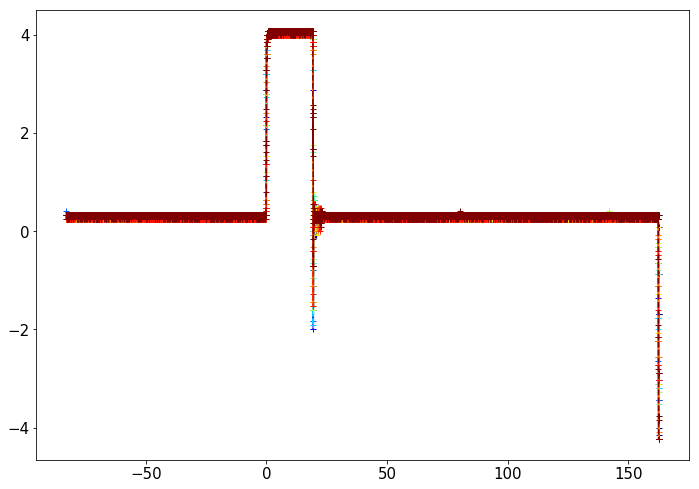

In [19]:
# Plot des portes

my_plot = [0,1,3,6,7,9]
trigger_val = 2.5
cl = [ cm.jet(x) for x in linspace(0,1,10)]

fig = plt.figure('Portes ES')
clf()
fig.set_size_inches(11.69,8.27)
ax1 = fig.add_subplot(111)
shift = []
loop = 0
for k,_ in enumerate(TP[:]):
    print(k)
    data = np.array(CH[k,1])
    shift_tmp = flatnonzero((data[:-1] < trigger_val) & (data[1:] > trigger_val))+1
    print(shift_tmp)
    shift.append(float( shift_tmp[0] *(max(TP[k]) - min(TP[k]))/len(data) )+TP[k,0])
    ax1.plot(subtract(TP[k],shift[loop])*1e6,data,
             color=cl[k],label='gate'+str(k),marker='+',ls='--')
    loop = loop + 1
    print(loop)
ax1.set_xlim(-0.3,0.3)
ax1.set_ylim(0,4)
tight_layout()
grid()
ax1.set_xlabel('[µs]')

In [57]:
# Plot des signaux MCP

my_plot = [12]
trigger_val = 2.5
cl = [ cm.jet(x) for x in linspace(0,1,len(my_plot))]

fig = plt.figure('Portes ES')
clf()
fig.set_size_inches(11.69,8.27)
ax1 = fig.add_subplot(111)
shift = []
loop = 0
for k in my_plot:
    print(k)
    data = np.array(CH[k,1])
    shift_tmp = flatnonzero((data[:-1] < trigger_val) & (data[1:] > trigger_val))+1
    print(shift_tmp)
    shift.append(float( shift_tmp[0] *(max(TP[k]) - min(TP[k]))/len(data) )+TP[k,0])
    ax1.plot(TP[k]*1e6,CH[k,0,:]*1000,color=cl[loop])
    loop += 1
    print(loop)
ax1.set_xlim(-0,60)
ax1.set_ylim(-4, 2)

grid()
ax1.set_xlabel('[µs]')
ax1.set_ylabel('[mV]')
tight_layout()

12
[4152]
1


In [32]:
# Plot des signaux MCP

my_plot = [0,1,3,6,7,9]
trigger_val = 2.5
cl = [ cm.jet(x) for x in linspace(0,1,len(CH[:]))]

fig = plt.figure('Portes ES')
clf()
fig.set_size_inches(11.69,8.27)
ax1 = fig.add_subplot(111)
shift = []
loop = 0
for k,_ in enumerate(TP[:]):
    print(k)
    data = np.array(CH[k,1])
    shift_tmp = flatnonzero((data[:-1] < trigger_val) & (data[1:] > trigger_val))+1
    print(shift_tmp)
    shift.append(float( shift_tmp[0] *(max(TP[k]) - min(TP[k]))/len(data) )+TP[k,0])
    ax1.plot(TP[k]*1e6,CH[k,0,:]*1000,color=cl[k])
    loop = loop + 1
    print(loop)
ax1.set_xlim(-0,140)
ax1.set_ylim(-13, 2)
tight_layout()
grid()
ax1.set_xlabel('[µs]')

0
[4145]
1
1
[4153]
2
2
[4153]
3
3
[4153]
4
4
[4153]
5
5
[4153]
6
6
[4153]
7
7
[4153]
8
8
[4153]
9
9
[4152]
10
10
[4153]
11
11
[4153]
12
12
[4152]
13
13
[4152 4848]
14
14
[4153]
15
15
[4153]
16
16
[4153]
17
17
[4153]
18
18
[4153]
19
19
[4153]
20
20
[4153]
21
21
[4153]
22
22
[4152]
23
23
[4153]
24
24
[4153]
25
25
[4152 5289]
26
26
[4153]
27
27
[4152]
28


Text(0.5,9.44444,'[µs]')

In [80]:
# Plot integrale signaux MCP

my_plot = [0,1,3,6,7,9]
my_label = [5, 10, 15, 20, 25]
trigger_val = 2.5
cl = [ cm.hsv(x) for x in linspace(0,1,10)]

fig = plt.figure('Portes ES')
clf()
fig.set_size_inches(11.69,8.27)
title('ES signal and integral')
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212,sharex=ax1)
shift = []
loop = 0
int_CH = []
for k,_ in enumerate(TP[:]):
    print(k)
    data = np.array(CH[k,1])
    shift_tmp = flatnonzero((data[:-1] < trigger_val) & (data[1:] > trigger_val))+1
    print(shift_tmp)
    shift.append(float( shift_tmp[0] *(max(TP[k]) - min(TP[k]))/len(data) )+TP[k,0])
    int_CH.append( scipy.integrate.cumtrapz(CH[k,0,:],TP[k]))
    ax1.plot(TP[k]*1e6,CH[k,0,:]*1000,color=cl[k],ls='',marker='+',ms=0.81,label='')
    ax2.plot(TP[k,:-1]*1e6,int_CH[k]*1e9,color=cl[k],ls='--')
    loop = loop + 1
    
ax1.set_xlim(-0,140)
ax1.set_ylim(-13.5, 2)
ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=5))

ax1.grid()
ax2.grid()
ax1.set_ylabel('[mW]')
ax2.set_ylabel('[mV.µs] ?')
ax2.set_xlabel('[µs]')

plt.setp(ax1.get_xticklabels(), visible=False)

tight_layout()
subplots_adjust(hspace=0)

0
[3983]
1
[3984]
2
[3986]
3
[4023]
4
[5070]
5
[4023]
6
[4023]
7
[4024]


In [173]:
mean(CH[k,0,1000:4000])

0.0005392533333333333

In [180]:
# plot var t pulse

cl = [ cm.jet(x) for x in linspace(0,1,6)]

my_label = [5, 10, 15, 20, 25]

fig = plt.figure('all_MCP')
clf()
fig.set_size_inches(11.69,8.27)

ax1 = fig.add_subplot(211)
title('ES signal and integral')
ax2 = fig.add_subplot(212,sharex=ax1)

int_CH = []
offset = []
cnt = 0
for k in [3,2,5,6,7]:
    print(k)
    offset.append( mean(CH[k,0,1000:4000]) )
    ax1.plot(subtract(TP[k],shift[k]) *1e6,-(CH[k,0,:]-offset[cnt])*1000,
             color=cl[cnt], label = f'{my_label[cnt]:2.0f}'+ ' µs',marker='+',ms=2,ls='')
    ax1.plot(subtract(TP[k],shift[k]) *1e6,CH[k,1,:]/3+5.3,
             color=cl[cnt],marker='',ms=2,ls='-')
    int_CH.append( scipy.integrate.cumtrapz(CH[k,0,:]-offset[cnt],TP[k]))
    ax2.plot(TP[k,:-1]*1e6,-int_CH[cnt]*1e9,
             color=cl[cnt],label = f'{my_label[cnt]:2.0f}'+ ' µs',ls='-')
    cnt += 1

ax2.set_xlabel('[µs]')
ax1.set_ylabel('[mV]')
ax2.set_ylabel('[mV.µs] ?')
leg = ax1.legend(title='$T_{pulse}$')
leg.get_title().set_fontsize(20)
legg = ax2.legend(title='$T_{pulse}$')
legg.get_title().set_fontsize(20)

ax1.set_xlim(-0.5,130)
ax1.set_ylim(-0.5,7)
ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=5))
ax1.grid()
ax2.grid()

plt.setp(ax1.get_xticklabels(), visible=False)

tight_layout()
subplots_adjust(hspace=0)


# savefig('all_MCP_040419789789789789.png')

3
2
5
6
7


In [126]:
# plot var t pusle séparés

cl = [ cm.spring(x) for x in linspace(0,1,6)]
fig, ax = plt.subplots(3,2,num='all_MCP_sep',clear='True')
# fig.clf()
fig.set_size_inches(11.69,8.27)

cnt = 0
for k in [3,2,5,6,7]:
    x_pos = cnt % 3
    y_pos = int(floor(cnt/3))
    
    ax[x_pos,y_pos].plot(subtract(TP[k],shift[k]) *1e6,CH[k,0,:]*1000,
             color=cl[cnt], label = '$t_{pulse} = ' + f'${my_label[cnt]:2.0f}'+ ' µs')
    ax[x_pos,y_pos].grid()
    ax[x_pos,y_pos].legend()
    cnt += 1
    
    print(x_pos,y_pos)

plt.tight_layout()
savefig('all_MCP_sep_040419.png')

0 0
1 0
2 0
0 1
1 1


In [351]:
# var f 8pole

cl = ['xkcd:rouge','xkcd:easter purple']

fig = plt.figure('f1 vs. f2')
clf()
fig.set_size_inches(11.69,8.27)
title('$f_1$ vs. $f_2$')
ax1 = fig.add_subplot(111)

for k in [6,7]:
    print(k)
    ax1.plot( subtract(TP[k],shift[k-3]) *1e6,CH[k,0,:]*1000,color=cl[k-6],marker='+',ls='')

ax1.vlines(35.87,-8,-5,color='black',linestyle='--')
ax1.vlines(41.06,-8,-5,color='black',linestyle='--')
    
ax1.set_xlim(5, 100)
ax1.set_ylim(-8, 1)
ax1.set_xlabel('[µs]')
ax1.set_ylabel('[mV]')

labels = ['$f_1$', '$f_2$']
leg = ax1.legend(labels,title='$f_{8pôle}$',loc=3)
# ax1.legend(title='ES',loc=1,fontsize=11)
leg.get_title().set_fontsize(28)

ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=2))
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=20))
ax1.grid()


left, bottom, width, height = [0.50, 0.13, 0.42, 0.45] # cadre zoom
axins = fig.add_axes([left, bottom, width, height])

axins.plot(TP[k]*1e6,CH[6,0,:]*1000,color=cl[0],marker='+',ls='')
axins.plot(TP[k]*1e6,CH[7,0,:]*1000,color=cl[1],marker='+',ls='')
axins.grid()
x1, x2, y1, y2 = 21, 33, -3.5, -0.8 # limites zoom
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

patch, pp1,pp2 = mark_inset(ax1, axins, loc1=1, loc2=1, fc="none", ec="0.4")
pp1.loc1 = 3 # inset_axes connector at lower left
pp2.loc2 = 1 # zoom patch connector at upper left
axins.yaxis.tick_right()
plt.setp(axins.get_xticklabels(), fontsize=12)
plt.setp(axins.get_yticklabels(), fontsize=12)


fig.tight_layout()

savefig('f1vsf2.png')

/home/adrian/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/adrian/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


6
7


In [17]:
# high res

cl = ['xkcd:rouge','xkcd:blue with a hint of purple']

fig = plt.figure('high-res')
clf()
fig.set_size_inches(11.69,8.27)
title('V bloquage sortie 8-pôle')
ax1 = fig.add_subplot(111)

toto = 0
tata = [0,2]
for k in [0,3]:
    print(k)
    ax1.plot( subtract(TP[k],shift[tata[toto]]) *1e6,CH[k,0,:]*1000,color=cl[toto],ls='-')
    toto += 1
    
ax1.vlines(38.45,-11,-8,color='black',linestyle='--')
ax1.vlines(39.6,-11,-8,color='black',linestyle='--')
plt.text(38.74, -11.2, "$\Delta_t = 1.15$ µs",
         va="baseline", ha="center", multialignment="right",
         bbox=dict(fc="white"))
    
ax1.set_xlim(12, 120)
ax1.set_ylim(-12, 1)
# ax1.set_xlabel('[µs]')
# ax1.set_ylabel('[mV]')

labels = ['5 V', '57 V']
leg = ax1.legend(labels,title='$V_{bloq}$',loc=3)
# ax1.legend(title='ES',loc=1,fontsize=11)
leg.get_title().set_fontsize(28)

ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=2))
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=20))
ax1.grid()


left, bottom, width, height = [0.40, 0.13, 0.51, 0.55] # cadre zoom
axins = fig.add_axes([left, bottom, width, height])

axins.plot(subtract(TP[0],shift[0])*1e6,CH[0,0,:]*1000,color=cl[0],marker='+',ls='')
axins.plot(subtract(TP[3],shift[2])*1e6,CH[3,0,:]*1000,color=cl[1],marker='+',ls='')
axins.grid()
x1, x2, y1, y2 = 19, 32, -4.2, -0.8 # limites zoom
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

axins.vlines(22.06,-3.8,-1,color='black',linestyle='--')
axins.vlines(22.977,-3.8,-1,color='black',linestyle='--')

plt.text(22.45, -3.8, "$\Delta_t = 0.91$ µs",
         va="baseline", ha="center", multialignment="right",
         bbox=dict(fc="white"))

patch, pp1,pp2 = mark_inset(ax1, axins, loc1=1, loc2=1, fc="none", ec="0.4")
pp1.loc1 = 3 # inset_axes connector at lower left
pp2.loc2 = 1 # zoom patch connector at upper left
axins.yaxis.tick_right()
plt.setp(axins.get_xticklabels(), fontsize=12)
plt.setp(axins.get_yticklabels(), fontsize=12)


fig.tight_layout()

savefig('Vbloq.png')

/home/adrian/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/adrian/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


0
3


In [24]:
# Plot signaux high res

cl = ['xkcd:dark blue','xkcd:vermillion']

fig = plt.figure('high res.')
clf()
fig.set_size_inches(11.69,8.27)
title('High res.')
ax1 = fig.add_subplot(111)

ax1.plot(subtract(TP_aux[0],0) *1e6,CH_aux[0,0,:]*1000,
             color=cl[0])
ax1.plot(subtract(TP_aux[0,0:5000],0) *1e6,CH_aux[0,1,0:5000]-10,
             color=cl[1])


ax1.set_xlabel('[µs]')
ax1.set_ylabel('[mV]')
my_label = ['MCP', 'Porte']
leg = ax1.legend(title='$T_{pulse}$',labels=my_label)
leg.get_title().set_fontsize(28)

ax1.set_xlim(-2,80)
ax1.set_ylim(-13,1)
ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=2))
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=0.4))
ax1.grid()
fig.tight_layout()

savefig('high_res.png')

/home/adrian/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [641]:
# Plot signaux calib

# plot var t pulse

cl = ['xkcd:neon green','xkcd:azul','xkcd:rouge']

fig = plt.figure('no ES')
clf()
fig.set_size_inches(11.69,8.27)
title('no ES')
ax1 = fig.add_subplot(111)

cnt = 0
for k in [0,1]:
    print(k)
    ax1.plot(subtract(TP[k],shift[k]) *1e6,CH[k,0,:]*1000,
             color=cl[cnt])
    cnt += 1
ax1.plot(subtract(TP[k,0:5000],shift[k]) *1e6,CH[k,1,0:5000]-10,
             color=cl[2])


ax1.set_xlabel('[µs]')
ax1.set_ylabel('[mV]')
my_label = ['Pas Bouchon', 'Bouchon']
leg = ax1.legend(title='$T_{pulse}$',labels=my_label)
leg.get_title().set_fontsize(28)

ax1.set_xlim(-2,80)
ax1.set_ylim(-13,1)
ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=2))
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=10))
ax1.grid()
fig.tight_layout()

savefig('no_ES.png')

/home/adrian/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


0
1


In [654]:
# Plot signaux calib

# plot var t pulse

cl = ['xkcd:neon green','xkcd:azul','xkcd:rouge','xkcd:vermillion','xkcd:dark blue']

fig = plt.figure('compare')
clf()
fig.set_size_inches(11.69,8.27)
title('compare')
ax1 = fig.add_subplot(111)

cnt = 0
for k in [0,1]:
    print(k)
    ax1.plot(subtract(TP[k],shift[k]) *1e6,CH[k,0,:]*1000,
             color=cl[cnt])
    cnt += 1
ax1.plot(subtract(TP[k,0:5000],shift[k]) *1e6,CH[k,1,0:5000]-10,
             color=cl[2])

ax1.plot(subtract(TP_aux[0],0) *1e6,CH_aux[0,0,:]*1000,
             color=cl[4])
ax1.plot(subtract(TP_aux[0,0:5000],shift[k]) *1e6,CH_aux[0,1,0:5000]-10,
             color=cl[3])


ax1.set_xlabel('[µs]')
ax1.set_ylabel('[mV]')
my_label = ['Pas Bouchon', 'Bouchon','Pulse bouchon','MCP','pulse MCP']
leg = ax1.legend(title='$T_{pulse}$',labels=my_label)
leg.get_title().set_fontsize(28)

ax1.set_xlim(-2,120)
ax1.set_ylim(-13,1)
ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=2))
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=10))
ax1.grid()
fig.tight_layout()

savefig('stack_compare.png')

/home/adrian/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


0
1


In [87]:
cl = [ cm.cool(x) for x in linspace(0,1,6)]

fig = plt.figure('plot_flytime_MCP')
fig.set_size_inches(11.69,8.27)
clf()
ax1 = fig.add_subplot(111)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%3.0f'))
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=20))

ax1.plot(TP[6]*1e6,CH[6,0,:]*1e3,
    color=cl[2],label='Signal MCP')
ax1.plot(TP[6]*1e6,(CH[6,1,:]/500-0.02)*1e3,
    color=cl[4],label='Pulse')
legend(title='',loc=1)
ax1.set_xlabel('Temps [µs]')
ax1.set_ylabel('Tension [mV]')
ax1.grid()
fig.tight_layout()
# savefig('pire_lock.png')